# 📊 ANÁLISE DE DADOS COM PYTHON - Criptomoedas

Este projeto é uma exploração aprofundada do mercado de criptomoedas, com foco na análise de tendências de crescimento e na identificação de padrões de comportamento ao longo do tempo. Utilizando bibliotecas como **Pandas**, **Seaborn** e outras ferramentas do ecossistema Python, foram criados gráficos e tabelas que facilitam a interpretação dos dados e permitem o teste de hipóteses e a análise de correlações entre variáveis relevantes.

O objetivo principal é obter, organizar e analisar dados históricos de diferentes criptoativos, realizando cálculos como **lucro/prejuízo**, **variações percentuais** e **desempenho de estratégias**. As visualizações geradas ajudam na compreensão da performance dos ativos e no suporte à tomada de decisões.

---

## 🧠 Descrição do Projeto

O projeto é estruturado em funções modulares que automatizam o processo de **coleta**, **processamento** e **análise dos dados**. Entre as principais funcionalidades, destacam-se:

- 📈 Cálculo de indicadores financeiros como **lucro percentual**, **volatilidade** e **mudanças acumuladas**;
- 🎯 Visualizações como **boxplots**, **gráficos de violino**, **histogramas** e **linhas de tendência**;
- 🔍 Análise comparativa entre diferentes moedas digitais e estratégias de investimento.

---

Este projeto é uma excelente base para estudos de mercado, testes de hipóteses financeiras e desenvolvimento de estratégias quantitativas para o universo cripto.


# BIBLIOTECAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# LEITURA DOS DADOS

In [2]:
df = pd.read_parquet('DADOS_SIMULADOS_1semana_1h_definitivos.parquet')

In [3]:
df.head()  # Ver as primeiras linhas

,Moeda,CANDLE_PERIOD,Estrategia,Data_Inicio,Data_Fim,Saldo_Final,Lucro_%,Total_Trades,Trades_Lucrativos,Valor_Lucro_Total,Trades_Preuízo,Valor_Preuízo_Total,Lucro_Médio_Trade,Lucro_%_Médio,Prejuízo_Médio_Trade,Prejuízo_%_Médio
0,BTC,1h,UT BOTS,2025-01-05,2025-01-11,996.782744,-0.321726,10.0,1.0,33.751734,4.0,-36.968990,33.751734,3.375173,9.242247,0.924225
1,BTC,1h,MA RSI e VOLUME,2025-01-05,2025-01-11,1001.076121,0.107612,11.0,3.0,36.970094,3.0,-35.893973,12.323365,1.232336,11.964658,1.196466
2,BTC,1h,MA ANTECIPATION 7_40,2025-01-05,2025-01-11,1028.803867,2.880387,3.0,2.0,28.803867,0.0,0.000000,14.401933,1.440193,0.000000,0.000000
3,BTC,1h,MA ANTECIPATION 5_10,2025-01-05,2025-01-11,921.700931,-7.829907,16.0,3.0,23.010721,5.0,-101.309791,7.670240,0.767024,20.261958,2.026196
4,BTC,1h,MA ANTECIPATION 5_13,2025-01-05,2025-01-11,923.677797,-7.632220,14.0,2.0,17.382745,5.0,-93.704948,8.691373,0.869137,18.740990,1.874099


# 📈 Analisando os Melhores Q1 (1º Quartil) por Moeda x Estratégia x Lucro

Nesta etapa, o foco da análise está no **primeiro quartil (Q1)** da distribuição dos lucros para cada combinação de **Moeda** e **Estratégia**. O Q1 representa o valor abaixo do qual estão os **25% menores resultados** de uma amostra.

### 🔍 Por que analisar o Q1?

Ao contrário do que pode parecer, analisar o Q1 **não significa focar nos piores resultados**. Pelo contrário, quando o Q1 está **acima de zero**, isso indica que **pelo menos 75% dos lucros daquela combinação são positivos**.

Isso torna o Q1 uma métrica extremamente útil para:

- ✅ **Identificar estratégias consistentes**, que raramente dão prejuízo;
- ✅ Avaliar a **robustez** de uma combinação Moeda x Estratégia;
- ✅ Evitar distorções causadas por poucos valores muito altos (outliers);
- ✅ Selecionar ativos cujo desempenho é mais **estável e confiável** ao longo do tempo.

Portanto, os **melhores Q1s** são indicadores de **segurança e consistência**, pois apontam combinações onde mesmo o pior cenário entre os 25% inferiores ainda gera lucro — uma excelente métrica para avaliar riscos e retorno sustentável.

---


In [15]:
lucro_agrupado = df.groupby(['Moeda', 'Estrategia'])['Lucro_%'].agg([
    ('Q1', lambda x: x.quantile(0.25)),
    ('Mediana', 'median')
]).reset_index()

# Ordenando pela Mediana decrescente (melhores estratégias primeiro)
lucro_agrupado_ordenado = lucro_agrupado.sort_values(by='Q1', ascending=False)

print(lucro_agrupado_ordenado)

      Moeda               Estrategia         Q1   Mediana
2750    TRX        Elder Force Index   1.008085  2.878337
2739    TRX   Accelerator Oscillator   0.979693  1.413716
1159    ETH          Bollinger Bands   0.956849  3.800422
2791    TRX                      ROC   0.955545  1.735264
3146    XLM  Moving Average Envelope   0.938233  2.187484
...     ...                      ...        ...       ...
1066    ENA           Stochastic RSI -12.532793 -3.790153
1071    ENA                  UT BOTS -13.013877 -8.042305
2679  TRUMP                Elder Ray -13.625974 -4.912797
1011    ENA   Accelerator Oscillator -13.888680 -2.954426
1028    ENA      HULL MOVING AVERAGE -15.598110 -6.498765

[3312 rows x 4 columns]


## 📊 Boxplot das Top 10 Moedas x Estratégias por Q1 (1º Quartil) + Violin Plot

Este gráfico combina **boxplot** e **violin plot** para fornecer uma visualização completa da distribuição dos lucros das 10 melhores combinações de **Moeda x Estratégia**, ordenadas pelo maior Q1.

O **boxplot** mostra a mediana, os quartis e possíveis outliers, enquanto o **violin plot** evidencia a **densidade dos lucros**, ou seja, onde estão mais concentrados os resultados.

### 🥇 Melhor Combinação: **TRX | Elder Force Index**

Entre todas as combinações analisadas, a **estratégia _Elder Force Index_ aplicada à moeda _TRX_** se destaca como a mais promissora sob a ótica do Q1. Isso porque:

- ✅ Seu **Q1 é o mais alto** dentre todas as combinações — indicando que **75% dos lucros ficaram acima desse ponto positivo**;
- ✅ **Não há outliers negativos**, o que sugere um comportamento mais **estável e previsível**;
- ✅ O **limite inferior da caixa (whisker)** não está muito abaixo de zero, o que reforça o **baixo risco de prejuízo significativo**;
- ✅ Sua **mediana está próxima de 3% de lucro**, representando um ganho central atrativo.

Esta análise mostra que a combinação **TRX com Elder Force Index** tem alto potencial de retorno com baixa variabilidade negativa — uma excelente candidata para estratégias consistentes no mercado cripto.


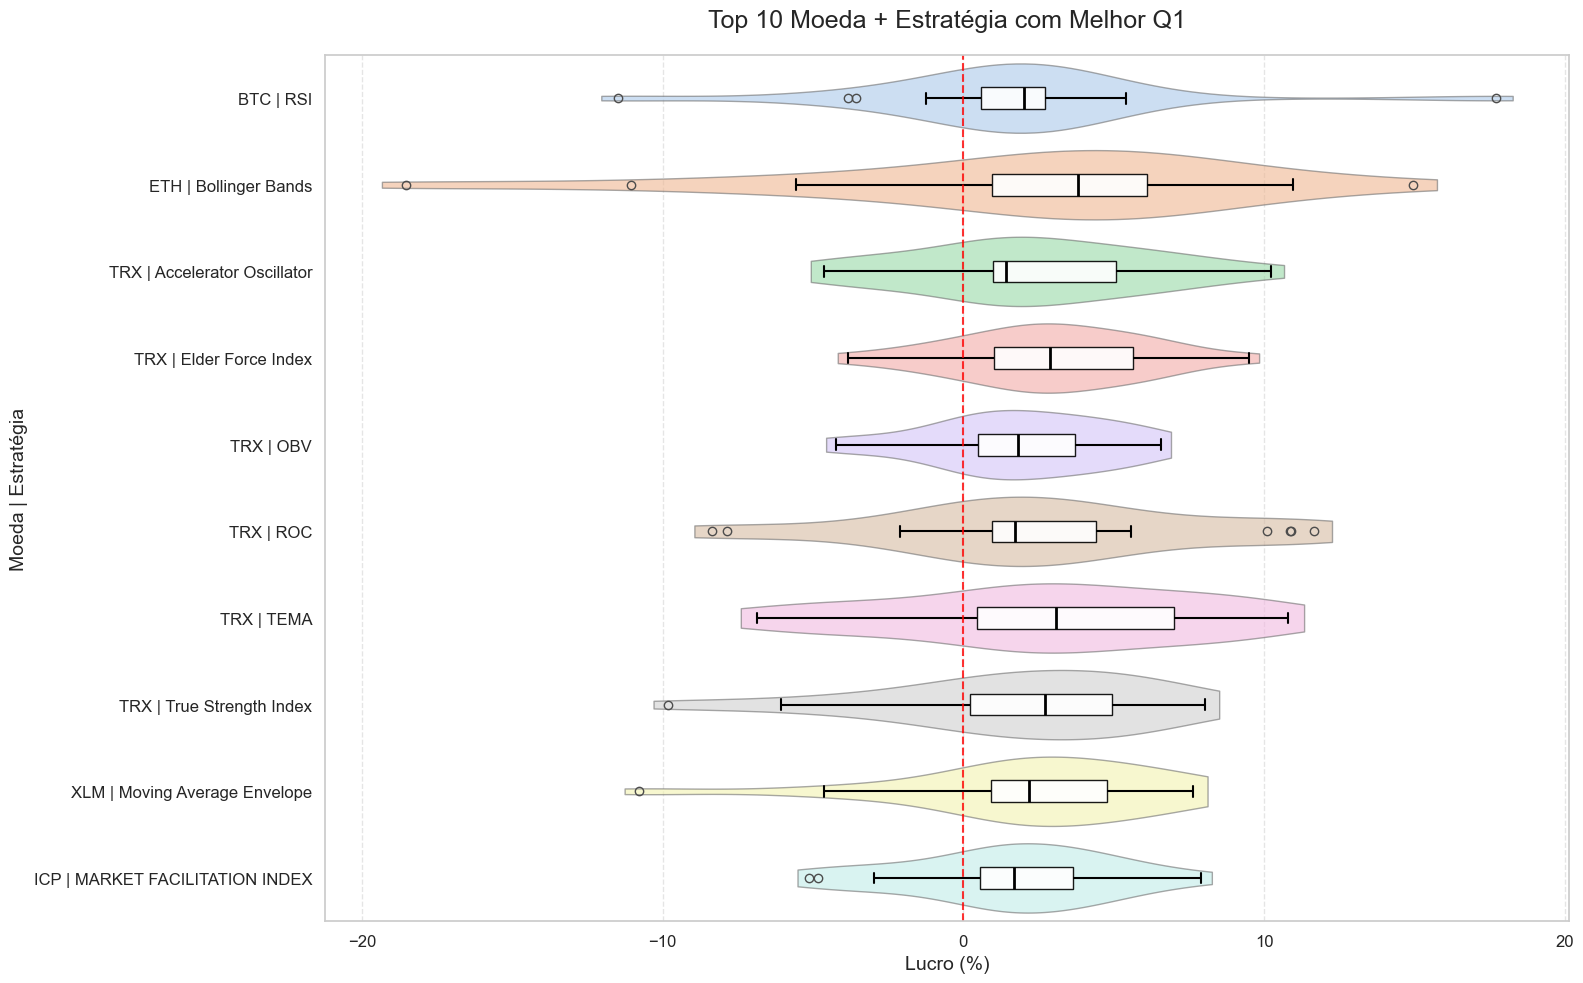

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

top10_pares = lucro_agrupado_ordenado.head(10)[['Moeda', 'Estrategia']]

df_top10 = df.merge(top10_pares, on=['Moeda', 'Estrategia'], how='inner')
df_top10['Label'] = df_top10['Moeda'].astype(str) + ' | ' + df_top10['Estrategia'].astype(str)

palette = sns.color_palette("pastel", n_colors=df_top10['Label'].nunique())

sns.violinplot(
    data=df_top10,
    x='Lucro_%',
    y='Label',
    hue='Label',
    palette=palette,
    inner=None,
    linewidth=1,
    alpha=0.6,
    cut=0.2,
    legend=False
)

sns.boxplot(
    data=df_top10,
    x='Lucro_%',
    y='Label',
    width=0.25,
    showfliers=True,
    boxprops=dict(facecolor='white', alpha=0.9, edgecolor='black'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.8)

plt.title('Top 10 Moeda + Estratégia com Melhor Q1', fontsize=18, pad=20)
plt.xlabel('Lucro (%)', fontsize=14)
plt.ylabel('Moeda | Estratégia', fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.5)

x_min = -20
x_max = int(np.ceil(df_top10['Lucro_%'].max()))

plt.xticks(np.arange(x_min, x_max + 10, 10))
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()
